In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import fft
from h5py import File

In [2]:
from KSVD import *
from ResultTest import PSNR
from ImgProcess import *

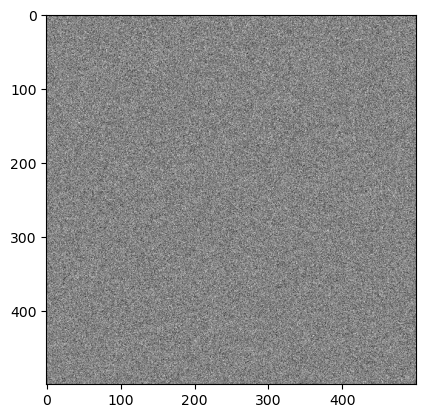

<Figure size 640x480 with 0 Axes>

In [3]:
img = plt.imread('../Images/McM images/McM13.tif') / 255
img = img[:, :, 1]

img_noisy = File('../Images/McM images/McM13_noise.mat')
img_noisy = [_.T / 255 for _ in img_noisy['u_n']] 
img_noisy = img_noisy[1]
plt.imshow(img_noisy - img, cmap='gray')

In [4]:
size = 16
sparsity = 6
eps = 1e-4

46.400982004358426


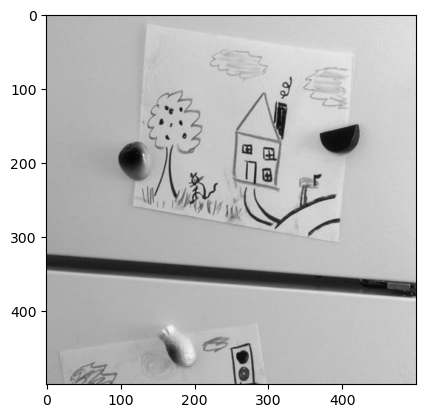

In [5]:
img_learned, mD = Learn(img, size, sparsity, 100, eps=eps)

print(PSNR(img, img_learned))
plt.imshow(img_learned, cmap='gray')

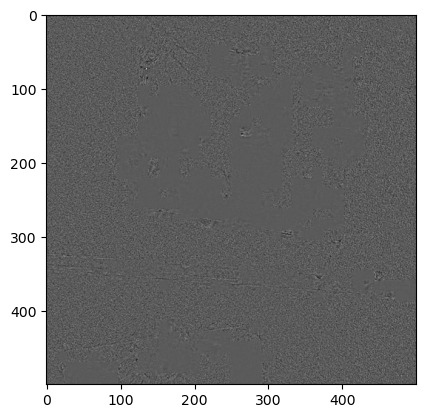

In [6]:
delta = img - img_learned
plt.imshow(delta, cmap='gray')

34.79745125994108


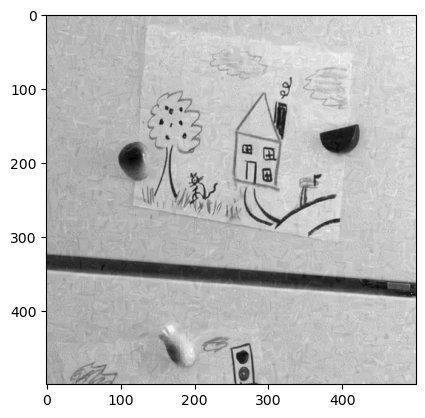

In [7]:
img_denoised, _ = Learn(img_noisy, size, 1, eps=1e-7, mD=mD)
print(PSNR(img, img_denoised))
plt.imshow(img_denoised, cmap='gray')

In [13]:
img_denoised

array([[0.48196309, 0.46716875, 0.46230894, ..., 0.5997408 , 0.60149953,
        0.58982617],
       [0.48255069, 0.46485837, 0.48388476, ..., 0.61741593, 0.62138374,
        0.59855077],
       [0.47267727, 0.4571607 , 0.49097405, ..., 0.61114726, 0.62871632,
        0.61531149],
       ...,
       [0.4506274 , 0.4476613 , 0.44092587, ..., 0.5346463 , 0.5294113 ,
        0.53159753],
       [0.45067156, 0.44963052, 0.44803175, ..., 0.53212896, 0.53131419,
        0.5312565 ],
       [0.45022072, 0.4508344 , 0.45184958, ..., 0.53348961, 0.53487446,
        0.53483937]])

In [8]:
mDD = (mD - mD.min()) / (mD.max() - mD.min())

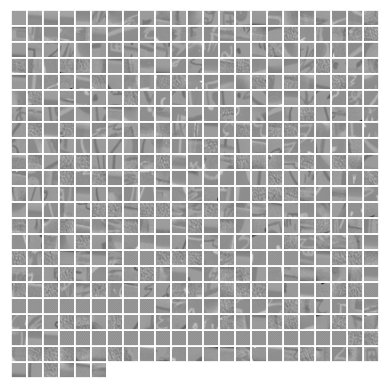

In [9]:
len_dict = 2 + (size + 2) * (int(size * 2**0.5) + 1)
img_dict = np.ones((len_dict, len_dict))
 
for j in range(mDD.shape[1]):
    atom = mDD[:, j].reshape((size, size))
    idx = np.unravel_index(j, (int(size * 2**0.5) + 1, int(size * 2**0.5) + 1))
    x = idx[0] * (size + 2) + 2
    y = idx[1] * (size + 2) + 2
    img_dict[x:x + size, y:y + size] = atom

plt.imshow(img_dict, cmap='gray')
plt.axis('off')
plt.show()